In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [3]:
Products = pd.read_csv(r'/Users/yujin-u/Desktop/model/products_no_china_no_token_v4.csv')

In [21]:
Products.shape

(70, 4)

In [5]:
df_0 = Products[Products['judge'] == 0].sample(n=40000, random_state=42)
df_1 = Products[Products['judge'] == 1].sample(n=60000, random_state=42)

# Concatenate the DataFrames
new_df = pd.concat([df_0, df_1])

In [6]:
y = new_df['judge']

In [7]:
y = pd.DataFrame(y)

In [8]:
df1 = []

In [9]:
df1 = pd.DataFrame(df1)

In [10]:
def string_to_list(input_string):
    # 문자열을 rhdqor()를 기준으로 나누어 리스트로 변환
    return str(input_string).split(' ')

df1['CATALOG_DESC'] = new_df['CATALOG_DESC'].apply(string_to_list)
df1['CATALOG_NM'] = new_df['CATALOG_NM'].apply(string_to_list)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Combine the elements of lists into a single string
df1['combined_text'] = df1['CATALOG_DESC'].apply(lambda x: ' '.join(map(str, x))) + ' ' + df1['CATALOG_NM'].apply(lambda x: ' '.join(map(str, x)))

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(df1['combined_text'], y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Save TF-IDF vectorizer to the notebook directory
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_tfidf)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_tfidf)

# Make predictions on the test set
y_test_pred = model.predict(X_test_tfidf)

# Evaluate the model on training set
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Training Set Accuracy: {accuracy_train:.2f}')

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Set Accuracy: {accuracy_val:.2f}')

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {accuracy_test:.2f}')

# Check for overfitting
if accuracy_train > accuracy_val:
    print("The model may be overfitting as it performs better on the training set.")
else:
    print("The model is not showing signs of overfitting.")

Training Set Accuracy: 0.98
Validation Set Accuracy: 0.80
Test Set Accuracy: 0.79
The model may be overfitting as it performs better on the training set.


In [30]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        49
     Class 1       0.59      1.00      0.74        70

    accuracy                           0.59       119
   macro avg       0.29      0.50      0.37       119
weighted avg       0.35      0.59      0.44       119



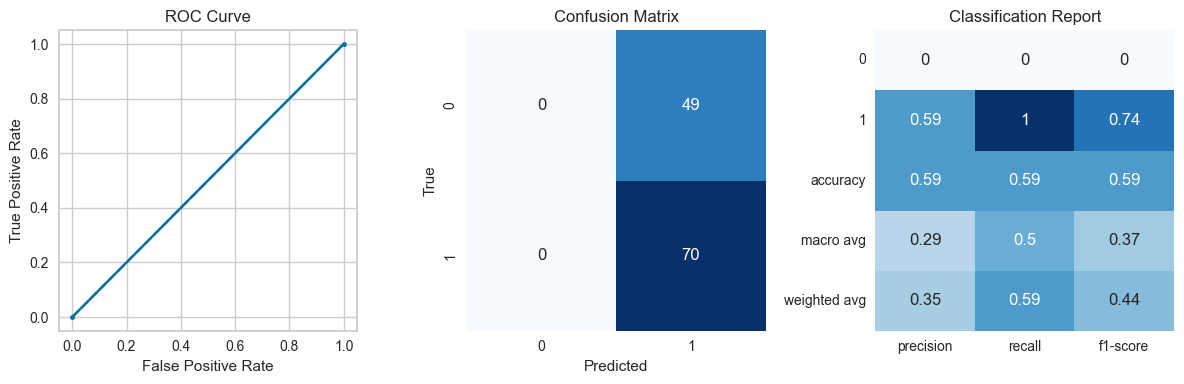

In [31]:
# 필요한 라이브러리 import
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, ClassificationReport
from sklearn.metrics import roc_curve, auc

y_pred = y_test_df_pred

# ROC 곡선 계산
fpr, tpr, ypr = roc_curve(y_test, y_pred)

# 그래프 그리기
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 랜덤 모델의 ROC 곡선
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Confusion Matrix 시각화
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Classification Report 시각화
plt.subplot(1, 3, 3)
classification_rep = classification_report(y_test, (y_pred > 0.5).astype(int), target_names=['Class 0', 'Class 1'])
print(classification_rep)
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, (y_pred > 0.5).astype(int), output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report')

# 각 시각화를 한 번에 보여주기
plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4522 1444]
 [1633 7401]]


In [13]:
test_df = pd.read_csv(r'/Users/yujin-u/Desktop/model/test_data_v4.csv')

In [14]:
test_df.head()

,Unnamed: 0,CATALOG_NM,CATALOG_DESC,judge
0,0,CS CELERSPORT 6 Pairs Ankle Athletic Running S...,Product details\nFabric type88.3% Combed Cotto...,1
1,1,Apple AirPods (2nd Generation) Wireless Ear Bu...,HIGH-QUALITY SOUND — Powered by the Apple H1 h...,0
2,2,Home Office Chair Ergonomic Desk Chair Mesh Co...,Brand\tBestOffice\nColor\tBlack\nProduct Dimen...,1
3,3,Magnesium Sulfate Anhydrous,MAGNESIUM SULFATE ANHYDROUS CAS NO.:14168-73-1...,1
4,4,BANDAI NAMCO Entertainment Armored Core VI: Fi...,A new action experience from the makers of Dar...,0


In [15]:
y_test = test_df['judge']

In [16]:
y_test = pd.DataFrame(y_test)

In [17]:
# Load the saved TF-IDF vectorizer
tfidf_vectorizer = joblib.load('/Users/yujin-u/Desktop/model/tfidf_vectorizer.joblib')

test_df['combined_text'] = (
    test_df['CATALOG_DESC'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
    + ' ' +
    test_df['CATALOG_NM'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
)

# TF-IDF Vectorization for the new data
X_test_df_tfidf = tfidf_vectorizer.transform(test_df['combined_text'])

# Make predictions on the new data
y_test_df_pred = model.predict(X_test_df_tfidf)

In [18]:
tfidf_vectorizer = joblib.load('/Users/yujin-u/Desktop/model/tfidf_vectorizer.joblib')

test_df['combined_text'] = (
    test_df['CATALOG_DESC'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
    + ' ' +
    test_df['CATALOG_NM'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
)

# TF-IDF Vectorization for the new data
X_test_df_tfidf = tfidf_vectorizer.transform(test_df['combined_text'])

# Get predicted probabilities for each class
y_test_df_probabilities = model.predict_proba(X_test_df_tfidf)

# Apply threshold of 0.7
threshold = 0.7
y_test_df_pred = (y_test_df_probabilities[:, 1] > threshold).astype(int)

# Compare predictions with the actual target values
test_df_results = pd.DataFrame({'Actual': test_df['judge'], 'Predicted': y_test_df_pred})
print("Predictions on test_df with threshold 0.7:")
print(test_df_results)

Predictions on test_df with threshold 0.7:
     Actual  Predicted
0         1          1
1         0          1
2         1          1
3         1          1
4         0          1
..      ...        ...
114       1          1
115       1          1
116       1          1
117       1          1
118       1          1

[119 rows x 2 columns]


In [19]:
test_df_results.head(30)

,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,1
5,0,1
6,1,1
7,1,1
8,0,1
9,0,1
